# Lead Scoring

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

### Inspecting

In [57]:
df = pd.read_csv('Leads.csv')
df.to_pickle('init.pkl')

In [58]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [59]:
df.shape

(9240, 37)

In [60]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [62]:
for column in df.select_dtypes('object').columns:
    print(f"============= {column} =============")
    print(df[column].value_counts(normalize=True)[:5])

============= Prospect ID =============
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
Name: proportion, dtype: float64
============= Lead Origin =============
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
============= Lead Source =============
Lead Source
Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: proportion, dtype: float64
============= Do Not Email =============
Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64
============= Do Not Call =============
Do Not Call
No     0.99978

### Removing ID

In [63]:
# Remove Identity columns as they do not have any prediction power (too unique)
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

### Replacing 'Select' Terms

In [64]:
# The "Select" terms must be replaced from all columns (missing data)
df.replace('Select', np.nan, inplace=True)

### Columns with high Missing Values

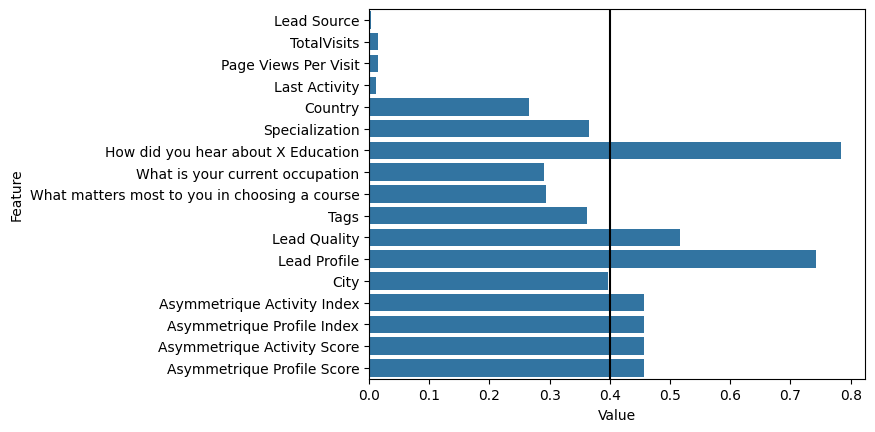

In [65]:
# Check the number of nulls
NULL_COLUMN_THRESHOLD = 0.4

null_percent = df.isnull().sum() / df.shape[0] 
null_features = null_percent[null_percent > 0]

# Drop any columns with null values more than this%
df.drop(columns=null_percent[null_percent > NULL_COLUMN_THRESHOLD].index, inplace=True)

# Visualize.
null_features_df = null_features.reset_index()
null_features_df.columns = ['Feature', 'Value']
sns.barplot(x='Value', y='Feature', data=null_features_df, orient='h')

plt.axvline(NULL_COLUMN_THRESHOLD, color='k')
plt.show()

### Constant Columns

In [66]:
# Remove columns with all values constant.

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("removing", constant_cols)

removing ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [67]:
df.drop(columns=constant_cols, inplace=True)

In [68]:
df.to_pickle('eda_constant_removed.pkl')

### Binary Variables

In [69]:
boolean_columns = [
    'Do Not Email', 'Do Not Call',
    'Search', 'Magazine', 'Newspaper Article', 
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 
    'Through Recommendations', 'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 'Get updates on DM Content', 
    'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
]

def yes_no_boolean(value):
    if isinstance(value, bool):
        # already converted.
        return value
    if value.lower() == 'yes':
        return True
    elif value.lower() == 'no':
        return False
    raise ValueError(f"Invalid value: {value}")

for column in boolean_columns:
    if column not in df.columns:
        # dropped before.
        continue
    df[column] = df[column].apply(yes_no_boolean).astype(bool)

In [70]:
# ensure there is no other value except for True and False.
df['Converted'] = df['Converted'].astype(bool)

### Clubbing Categorical Values

In [71]:
# club less common values together into one category.
# also include NA.

In [72]:
threshold = 0.95

for column in df.select_dtypes(include=['object']).columns:
# for column in ['Country']:
    # print(f"============= {column} ===============")
    value_counts = df[column].value_counts(normalize=True)
    cumulative_counts = value_counts.cumsum()
    less_common_values = cumulative_counts[cumulative_counts > threshold].index.to_list()

    first_category = value_counts.index[0]
    if cumulative_counts[first_category] > threshold:
        less_common_values.remove(first_category)

    # print("less_common_values", less_common_values)

    def replacer(value):
        if pd.isna(value):
            return value
        if value not in less_common_values:
            return value
        return 'others'
    
    df[column] = df[column].apply(replacer)
    print(f"Number of uniques for '{column}' is", df[column].nunique())

Number of uniques for 'Lead Origin' is 3
Number of uniques for 'Lead Source' is 5
Number of uniques for 'Last Activity' is 7
Number of uniques for 'Country' is 2
Number of uniques for 'Specialization' is 14
Number of uniques for 'What is your current occupation' is 2
Number of uniques for 'What matters most to you in choosing a course' is 2
Number of uniques for 'Tags' is 12
Number of uniques for 'City' is 5
Number of uniques for 'Last Notable Activity' is 5


### Null Row Removal

In [73]:
df['Converted'].value_counts()

Converted
False    5679
True     3561
Name: count, dtype: int64

In [74]:
# Logistic Regression requires all non-null rows, so we drop any rows with any null column value
rows_to_be_removed = df.isnull().any(axis=1)
print("removing", sum(rows_to_be_removed))
df = df[~rows_to_be_removed]

removing 5616


In [75]:
# still balanced.
df['Converted'].value_counts()

Converted
False    1998
True     1626
Name: count, dtype: int64

In [76]:
# Fraction of rows retained after cleanup.
len(df) / len(pd.read_pickle('init.pkl'))

0.3922077922077922

In [77]:
df.to_pickle('eda_final.pkl')

## Modelling

In [78]:
# pick last element from the dataframes array.
df = pd.read_pickle('eda_final.pkl')

### Scaling

In [79]:
df.select_dtypes(exclude=['object', 'bool']).columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary and categorical
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

df[num_vars] = scaler.fit_transform(df[num_vars])


In [81]:
df[num_vars].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2,0.007968,0.674296,0.125000
3,0.003984,0.134243,0.062500
6,0.007968,0.721831,0.125000
10,0.031873,0.594630,0.500000
11,0.031873,0.591109,0.166875


In [82]:
df.to_pickle('model_scale.pkl')

### Dummy Columns

In [83]:
df.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [84]:
# create dummies
cat_columns = list(set(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity']).intersection(df.columns))

df = pd.get_dummies(df, drop_first=True, columns=cat_columns)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


In [85]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,What is your current occupation_others,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others
2,0,0,1,0.007968,0.674296,0.125000,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0.003984,0.134243,0.062500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,0.007968,0.721831,0.125000,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
10,0,0,1,0.031873,0.594630,0.500000,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11,0,0,1,0.031873,0.591109,0.166875,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
df.to_pickle("model_dummy.pkl")

### Train Test Split

In [87]:
df.shape

(3624, 60)

In [88]:
TRAIN_SIZE = 0.8
RANDOM_STATE = 100
Y_LABEL = 'Converted'

In [89]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 1-TRAIN_SIZE, random_state = RANDOM_STATE)

y_train = df_train[Y_LABEL]
X_train = df_train.drop(columns=Y_LABEL)
y_test = df_test[Y_LABEL]
X_test = df_test.drop(columns=Y_LABEL)

### Basic Model

In [90]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, predictions_train))
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1615
           1       0.97      0.95      0.96      1284

    accuracy                           0.97      2899
   macro avg       0.97      0.96      0.96      2899
weighted avg       0.97      0.97      0.97      2899

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       383
           1       0.93      0.92      0.93       342

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



In [91]:
# Even without using RFE, this preliminary model is quite strong.

### RFE

In [92]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [93]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


In [94]:
model.fit(X_train_rfe, y_train)
predictions_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, predictions_rfe)
print(f"Model Accuracy with RFE: {accuracy_rfe}")

Model Accuracy with RFE: 0.9420689655172414


In [95]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_others', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'What is your current occupation_others', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent'],
      dtype='object')

In [96]:
# Calculate the VIFs for the new model
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X, y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.Logit(y, X).fit() # fitting the model
    return lm

def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### Removing high p-value

In [97]:
X_train_new = X_train[X_train.columns[rfe.support_]]
lm = build_model(X_train_new, y_train)
lm.summary()

         Current function value: 0.114633
         Iterations: 35


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2883
Method:                           MLE   Df Model:                           15
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8330
Time:                        04:25:33   Log-Likelihood:                -332.32
converged:                      False   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.1151      0.375    -13.646      0.000      -5.850      -4.380
Do Not Email                                -0.7832      0.547     -1.433      0.152      -1.854       0.288
TotalVisits                                 22.3191      7.850      2.843      0.004       6.934      37.704
Total Time Spent on Website                  3.7489      0.454      8.261      0.000       2.859       4.638
Lead Source_others                           1.2447      1.115      1.116      0.264      -0.941       3.430
Tags_Busy                                    3.2375      0.355      9.120      0.000       2.542       3.933
Tags_Closed by Horizzon                      8.0195      1.078      7.442      0.000       5.908      10.131
Tags_Interested in other courses            -1.2206      0.768     -1.589      0.112      -2.726       0.285
Tags_Lost to EINS                            7.4591      1.060      7.039      0.000       5.382       9.536
Tags_Not doing further education           -15.8971   1966.855     -0.008      0.994   -3870.862    3839.068
Tags_Ringing                                -0.5661      0.367     -1.541      0.123      -1.286       0.154
Tags_Will revert after reading the email     6.5539      0.339     19.336      0.000       5.890       7.218
Tags_switched off                           -1.2924      0.775     -1.667      0.096      -2.812       0.227
What is your current occupation_others       1.0052      0.422      2.380      0.017       0.177       1.833
Last Activity_Email Bounced                 -2.1028      1.039     -2.024      0.043      -4.140      -0.066
Last Activity_SMS Sent                       1.1400      0.245      4.648      0.000       0.659       1.621
============================================================================================================
"""

In [99]:
# drop due to high p-value
X_train_new.drop(['Tags_Not doing further education'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/1460431089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_Not doing further education'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.115262
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2884
Method:                           MLE   Df Model:                           14
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8321
Time:                        04:25:51   Log-Likelihood:                -334.14
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.2053      0.373    -13.946      0.000      -5.937      -4.474
Do Not Email                                -0.8428      0.536     -1.573      0.116      -1.893       0.208
TotalVisits                                 20.5906      7.220      2.852      0.004       6.440      34.742
Total Time Spent on Website                  3.7682      0.454      8.301      0.000       2.878       4.658
Lead Source_others                           1.2543      1.107      1.133      0.257      -0.916       3.425
Tags_Busy                                    3.3524      0.354      9.465      0.000       2.658       4.047
Tags_Closed by Horizzon                      8.1425      1.077      7.559      0.000       6.031      10.254
Tags_Interested in other courses            -1.1072      0.768     -1.441      0.149      -2.613       0.398
Tags_Lost to EINS                            7.5720      1.059      7.147      0.000       5.496       9.649
Tags_Ringing                                -0.4486      0.366     -1.227      0.220      -1.165       0.268
Tags_Will revert after reading the email     6.6676      0.338     19.718      0.000       6.005       7.330
Tags_switched off                           -1.1725      0.774     -1.514      0.130      -2.690       0.345
What is your current occupation_others       1.0204      0.424      2.405      0.016       0.189       1.852
Last Activity_Email Bounced                 -2.0757      1.030     -2.016      0.044      -4.094      -0.057
Last Activity_SMS Sent                       1.1490      0.245      4.685      0.000       0.668       1.630
============================================================================================================
"""

In [100]:
X_train_new.drop(['Lead Source_others'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/2865134204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Lead Source_others'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.115492
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2885
Method:                           MLE   Df Model:                           13
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8318
Time:                        04:26:10   Log-Likelihood:                -334.81
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.1724      0.370    -13.980      0.000      -5.898      -4.447
Do Not Email                                -0.8512      0.537     -1.586      0.113      -1.903       0.201
TotalVisits                                 20.7689      7.149      2.905      0.004       6.757      34.780
Total Time Spent on Website                  3.7424      0.452      8.275      0.000       2.856       4.629
Tags_Busy                                    3.3492      0.353      9.484      0.000       2.657       4.041
Tags_Closed by Horizzon                      8.2352      1.074      7.668      0.000       6.130      10.340
Tags_Interested in other courses            -1.1278      0.768     -1.469      0.142      -2.632       0.377
Tags_Lost to EINS                            7.5418      1.059      7.124      0.000       5.467       9.617
Tags_Ringing                                -0.4608      0.364     -1.265      0.206      -1.175       0.253
Tags_Will revert after reading the email     6.6605      0.337     19.746      0.000       5.999       7.322
Tags_switched off                           -1.1846      0.774     -1.531      0.126      -2.701       0.332
What is your current occupation_others       1.0276      0.426      2.413      0.016       0.193       1.862
Last Activity_Email Bounced                 -2.1063      1.033     -2.040      0.041      -4.130      -0.083
Last Activity_SMS Sent                       1.1290      0.244      4.622      0.000       0.650       1.608
============================================================================================================
"""

In [101]:
X_train_new.drop(['Tags_Ringing'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/1735103287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_Ringing'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.115765
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2886
Method:                           MLE   Df Model:                           12
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8314
Time:                        04:26:21   Log-Likelihood:                -335.60
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.3928      0.338    -15.961      0.000      -6.055      -4.731
Do Not Email                                -0.7833      0.538     -1.456      0.145      -1.837       0.271
TotalVisits                                 20.0471      7.196      2.786      0.005       5.943      34.151
Total Time Spent on Website                  3.7247      0.452      8.243      0.000       2.839       4.610
Tags_Busy                                    3.6234      0.289     12.525      0.000       3.056       4.190
Tags_Closed by Horizzon                      8.4498      1.060      7.968      0.000       6.371      10.528
Tags_Interested in other courses            -0.8969      0.751     -1.195      0.232      -2.368       0.575
Tags_Lost to EINS                            7.7755      1.045      7.437      0.000       5.726       9.825
Tags_Will revert after reading the email     6.9028      0.289     23.896      0.000       6.337       7.469
Tags_switched off                           -0.9029      0.744     -1.213      0.225      -2.362       0.556
What is your current occupation_others       1.1069      0.435      2.546      0.011       0.255       1.959
Last Activity_Email Bounced                 -2.1645      1.037     -2.087      0.037      -4.197      -0.132
Last Activity_SMS Sent                       1.0601      0.236      4.488      0.000       0.597       1.523
============================================================================================================
"""

In [102]:
X_train_new.drop(['Tags_Interested in other courses'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/2761456310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_Interested in other courses'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.116076
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2887
Method:                           MLE   Df Model:                           11
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8309
Time:                        04:26:36   Log-Likelihood:                -336.51
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4892      0.334    -16.430      0.000      -6.144      -4.834
Do Not Email                                -0.7638      0.541     -1.412      0.158      -1.824       0.296
TotalVisits                                 20.4016      7.204      2.832      0.005       6.282      34.521
Total Time Spent on Website                  3.7118      0.451      8.229      0.000       2.828       4.596
Tags_Busy                                    3.6862      0.288     12.818      0.000       3.123       4.250
Tags_Closed by Horizzon                      8.5541      1.060      8.072      0.000       6.477      10.631
Tags_Lost to EINS                            7.8702      1.044      7.539      0.000       5.824       9.916
Tags_Will revert after reading the email     6.9896      0.285     24.549      0.000       6.432       7.548
Tags_switched off                           -0.8446      0.744     -1.135      0.256      -2.303       0.614
What is your current occupation_others       1.0489      0.423      2.477      0.013       0.219       1.879
Last Activity_Email Bounced                 -2.1654      1.038     -2.087      0.037      -4.199      -0.131
Last Activity_SMS Sent                       1.1128      0.235      4.733      0.000       0.652       1.574
============================================================================================================
"""

In [103]:
X_train_new.drop(['Tags_switched off'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/2273174914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_switched off'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.116357
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2888
Method:                           MLE   Df Model:                           10
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8305
Time:                        04:27:14   Log-Likelihood:                -337.32
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5441      0.333    -16.656      0.000      -6.196      -4.892
Do Not Email                                -0.7952      0.536     -1.485      0.138      -1.845       0.255
TotalVisits                                 20.3793      7.233      2.817      0.005       6.202      34.556
Total Time Spent on Website                  3.7142      0.450      8.249      0.000       2.832       4.597
Tags_Busy                                    3.7531      0.284     13.195      0.000       3.196       4.311
Tags_Closed by Horizzon                      8.6035      1.059      8.125      0.000       6.528      10.679
Tags_Lost to EINS                            7.9241      1.044      7.593      0.000       5.879       9.969
Tags_Will revert after reading the email     7.0464      0.283     24.931      0.000       6.492       7.600
What is your current occupation_others       1.0751      0.426      2.521      0.012       0.239       1.911
Last Activity_Email Bounced                 -2.1426      1.038     -2.063      0.039      -4.178      -0.107
Last Activity_SMS Sent                       1.0940      0.234      4.668      0.000       0.635       1.553
============================================================================================================
"""

In [104]:
X_train_new.drop(['Do Not Email'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_65004/4122358117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Do Not Email'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.116772
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2899
Model:                          Logit   Df Residuals:                     2889
Method:                           MLE   Df Model:                            9
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8299
Time:                        04:27:33   Log-Likelihood:                -338.52
converged:                       True   LL-Null:                       -1990.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5784      0.333    -16.760      0.000      -6.231      -4.926
TotalVisits                                 20.0212      7.263      2.757      0.006       5.786      34.256
Total Time Spent on Website                  3.7464      0.449      8.339      0.000       2.866       4.627
Tags_Busy                                    3.7563      0.283     13.293      0.000       3.202       4.310
Tags_Closed by Horizzon                      8.6140      1.054      8.169      0.000       6.547      10.681
Tags_Lost to EINS                            7.9610      1.043      7.629      0.000       5.916      10.006
Tags_Will revert after reading the email     7.0769      0.283     24.980      0.000       6.522       7.632
What is your current occupation_others       1.0409      0.424      2.455      0.014       0.210       1.872
Last Activity_Email Bounced                 -2.7548      0.955     -2.886      0.004      -4.626      -0.884
Last Activity_SMS Sent                       1.0574      0.232      4.549      0.000       0.602       1.513
============================================================================================================
"""

### Checking VIF

In [105]:
check_VIF(X_train_new)

,Features,VIF
1,Total Time Spent on Website,2.44
5,Tags_Will revert after reading the email,2.28
8,Last Activity_SMS Sent,1.51
0,TotalVisits,1.38
6,What is your current occupation_others,1.31
3,Tags_Closed by Horizzon,1.15
2,Tags_Busy,1.10
4,Tags_Lost to EINS,1.06
7,Last Activity_Email Bounced,1.01


Stop iteration since all VIF are below 5. This is the final model

### Final Model

In [106]:
X_test = sm.add_constant(df_test)

X_test = X_test[lm.model.exog_names]

y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(sm.add_constant(X_train_new))

In [107]:
print(classification_report(y_train, (y_train_pred > 0.5)))
print(classification_report(y_test, (y_test_pred > 0.5)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1615
           1       0.97      0.96      0.96      1284

    accuracy                           0.97      2899
   macro avg       0.97      0.97      0.97      2899
weighted avg       0.97      0.97      0.97      2899

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       383
           1       0.94      0.94      0.94       342

    accuracy                           0.94       725
   macro avg       0.94      0.94      0.94       725
weighted avg       0.94      0.94      0.94       725

